In [1]:
%cd ..
%cd ..

C:\Users\Test\Geoalert\aeronetlib\aeronet_raster\test
C:\Users\Test\Geoalert\aeronetlib\aeronet_raster


# Pillow Image

In [2]:
from aeronet_raster.dataadapters import piladapter
from matplotlib import pyplot as plt

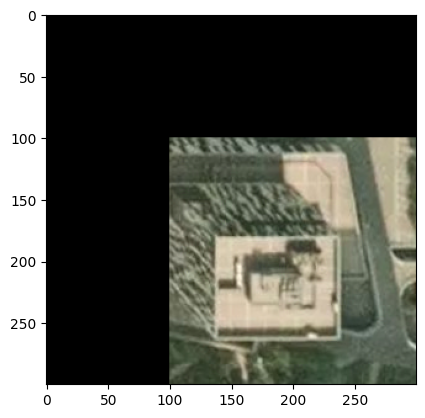

In [4]:
# reading from out of bounds
d = piladapter.PilReader('test/unit/test_data/image.png')
d.open()
plt.imshow(d[:, -100:200, -100:200].transpose(1, 2, 0))
d.close()

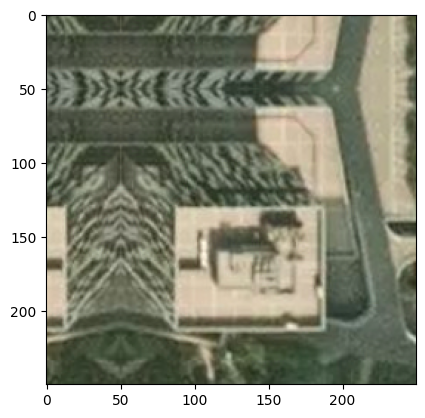

In [5]:
# as a context manager and with reflect padding
with piladapter.PilReader('test/unit/test_data/image.png', padding_mode='reflect') as d:
    plt.imshow(d[:, -50:200, -50:200].transpose(1, 2, 0))

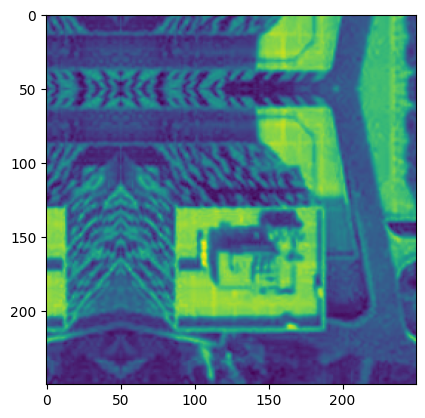

In [6]:
# reading single channel
with piladapter.PilReader('test/unit/test_data/image.png', padding_mode='reflect') as d:
    plt.imshow(d[0, -50:200, -50:200][0])

# Rasterio single file

In [7]:
from aeronet_raster.dataadapters import rasterioadapter
from matplotlib import pyplot as plt

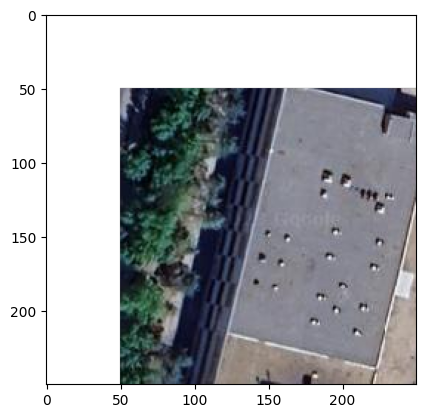

In [8]:
with rasterioadapter.RasterioReader('test/unit/test_data/input.tif') as d:
    plt.imshow(d[:, -50:200, -50:200].transpose(1, 2, 0))

# Two images stacked (e.g. rgb and mask)

In [12]:
from aeronet_raster.dataadapters import separatebandsadapter, piladapter
from matplotlib import pyplot as plt

<module 'aeronet_raster.dataadapters.separatebandsadapter' from 'C:\\Users\\Test\\Geoalert\\aeronetlib\\aeronet_raster\\aeronet_raster\\dataadapters\\separatebandsadapter.py'>

(6, 512, 512)


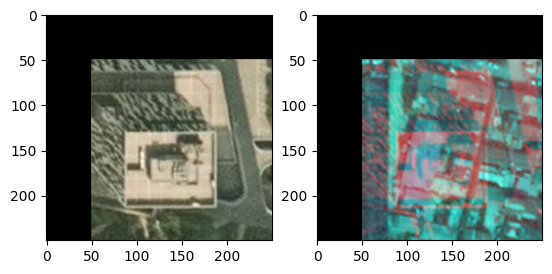

In [14]:
with separatebandsadapter.SeparateBandsReader([piladapter.PilReader(b) for b in ('test/unit/test_data/image.png',
                                                                                 'test/unit/test_data/image2.png')]) as d:
    print(d.shape)  # since image.png and image2.png both have 3 channels, resulting file will have 6 channels
    _, ax = plt.subplots(ncols=2)
    ax[0].imshow(d[:3, -50:200, -50:200].transpose(1, 2, 0))  # first image
    ax[1].imshow(d[2:5, -50:200, -50:200].transpose(1, 2, 0))  # channels 2:5

# Separate geotiff bands

In [15]:
from aeronet_raster.dataadapters import separatebandsadapter, rasterioadapter
from matplotlib import pyplot as plt

(3, 3428, 3429)


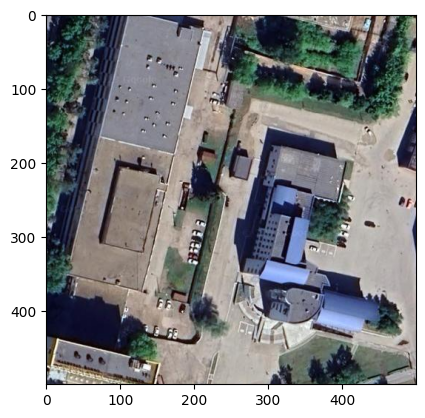

In [17]:
with separatebandsadapter.SeparateBandsReader([rasterioadapter.RasterioReader(b) for b in ('test/unit/test_data/RED.tif',
                                                                                           'test/unit/test_data/GRN.tif',
                                                                                           'test/unit/test_data/BLU.tif')]) as d:
    print(d.shape)
    plt.imshow(d[:, :500, :500].transpose(1, 2, 0))
